### 📊 Exploratory Data Analysis (EDA): Power System Faults Dataset

This notebook presents a comprehensive exploratory analysis of the **Power System Faults Dataset**, available on [Kaggle](https://www.kaggle.com/datasets/ziya07/power-system-faults-dataset). The dataset contains synthetic records of electrical power system faults across various geographic locations and weather conditions, designed for analysis, pattern recognition, and reliability prediction.

<img src="Electricity_grid.png" alt="Electricity grid" width="80%">


#### 📄 Dataset Description

Each row in the dataset represents a unique power system fault incident and includes information such as:

- **Fault Type** (e.g., Line Breakage, Transformer Failure)
- **Geographic Location** (Latitude & Longitude)
- **Environmental Conditions** (Temperature, Wind Speed, Weather)
- **Electrical Measurements** (Voltage, Current, Power Load)
- **Fault Duration and Downtime**
- **Maintenance and Component Health Status**

This EDA lays the groundwork for further reliability modeling, fault classification, or predictive maintenance applications.

In [6]:
# 📥 Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

***
### 📥 Load the dataset from URL

In [7]:
url = 'https://raw.githubusercontent.com/Dr-AlaaKhamis/ISE518/refs/heads/main/datasets/fault_data.csv'
df = pd.read_csv(url)

df.head()

,Fault ID,Fault Type,"Fault Location (Latitude, Longitude)",Voltage (V),Current (A),Power Load (MW),Temperature (C),Wind Speed (km/h),Weather Condition,Maintenance Status,Component Health,Duration of Fault (hrs),Down time (hrs)
0,F001,Line Breakage,"(34.0522, -118.2437)",2200,250,50,25,20,Clear,Scheduled,Normal,2.0,1.0
1,F002,Transformer Failure,"(34.056, -118.245)",1800,180,45,28,15,Rainy,Completed,Faulty,3.0,5.0
2,F003,Overheating,"(34.0525, -118.244)",2100,230,55,35,25,Windstorm,Pending,Overheated,4.0,6.0
3,F004,Line Breakage,"(34.055, -118.242)",2050,240,48,23,10,Clear,Completed,Normal,2.5,3.0
4,F005,Transformer Failure,"(34.0545, -118.243)",1900,190,50,30,18,Snowy,Scheduled,Faulty,3.5,4.0


#### 📂 Load dataset from local folder

In [8]:
# df = pd.read_csv("data/fault_data.csv")

# df.head()

***
#### 🔎 Data Quality Checks

In [9]:
# Check missing data
print("Missing values:")
print(df.isnull().sum())

# Check duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# # Data types
# print("\nData Types:")
# print(df.dtypes)

Missing values:
Fault ID                                0
Fault Type                              0
Fault Location (Latitude, Longitude)    0
Voltage (V)                             0
Current (A)                             0
Power Load (MW)                         0
Temperature (C)                         0
Wind Speed (km/h)                       0
Weather Condition                       0
Maintenance Status                      0
Component Health                        0
Duration of Fault (hrs)                 0
Down time (hrs)                         0
dtype: int64

Duplicate rows: 0


***
#### 📊 Univariate Analysis

In [10]:
# Summary statistics
summary = df.describe()
print(summary)

       Voltage (V)  Current (A)  Power Load (MW)  Temperature (C)  \
count   506.000000   506.000000       506.000000       506.000000   
mean   2049.636364   216.458498        50.011858        30.166008   
std     142.054146    21.499787         3.102834         6.118315   
min    1800.000000   180.000000        45.000000        20.000000   
25%    1923.000000   197.250000        47.000000        25.000000   
50%    2058.000000   218.000000        50.000000        30.000000   
75%    2165.750000   235.000000        53.000000        36.000000   
max    2300.000000   250.000000        55.000000        40.000000   

       Wind Speed (km/h)  Duration of Fault (hrs)  Down time (hrs)  
count         506.000000               506.000000       506.000000  
mean           19.739130                 4.008103         3.999802  
std             5.863052                 1.147271         1.842367  
min            10.000000                 2.000000         1.000000  
25%            15.000000         

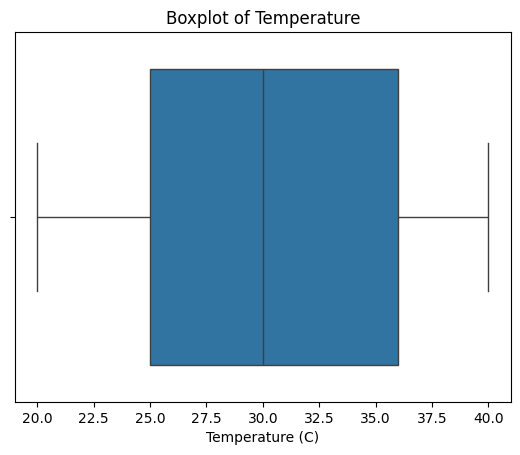

In [11]:
# Boxplot example for Temperature
sns.boxplot(x=df['Temperature (C)'])
plt.title("Boxplot of Temperature")
plt.show()

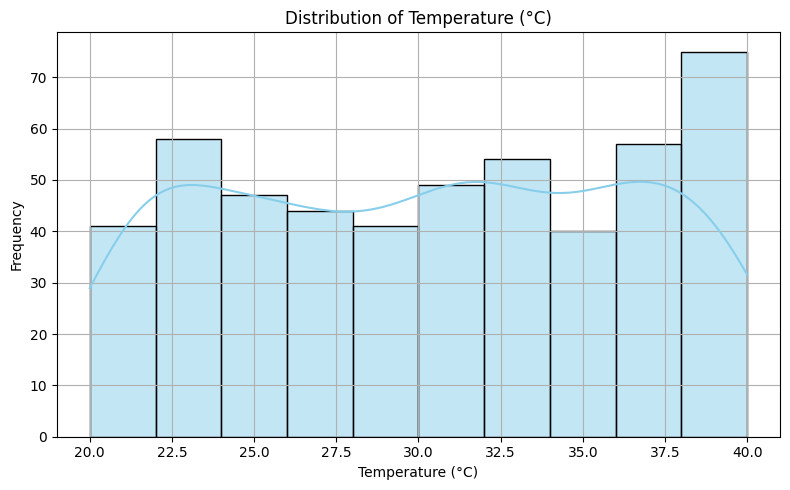

In [12]:
# Plot the distribution curve for a selected variable 
temp_data = df['Temperature (C)'].dropna() # Drop NA if any

plt.figure(figsize=(8, 5))
sns.histplot(temp_data, kde=True, bins=10, color='skyblue')
plt.title('Distribution of Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# Skewness & Kurtosis for Temperature
print(f"📈 Skewness: {skew(temp_data):.2f}")
print(f"📉 Kurtosis: {kurtosis(temp_data):.2f}")

📈 Skewness: -0.02
📉 Kurtosis: -1.25


#### 📈 Numerical Distribution

We analyze the distribution of each numerical feature using:

- **Histograms**: Show frequency of values grouped into bins.
- **KDE (Kernel Density Estimation) Plots**: Smoothed curves that estimate the probability density function of a continuous variable.

🔍 Helps identify:
- Normality
- Skewness
- Multimodal distributions
- Outliers

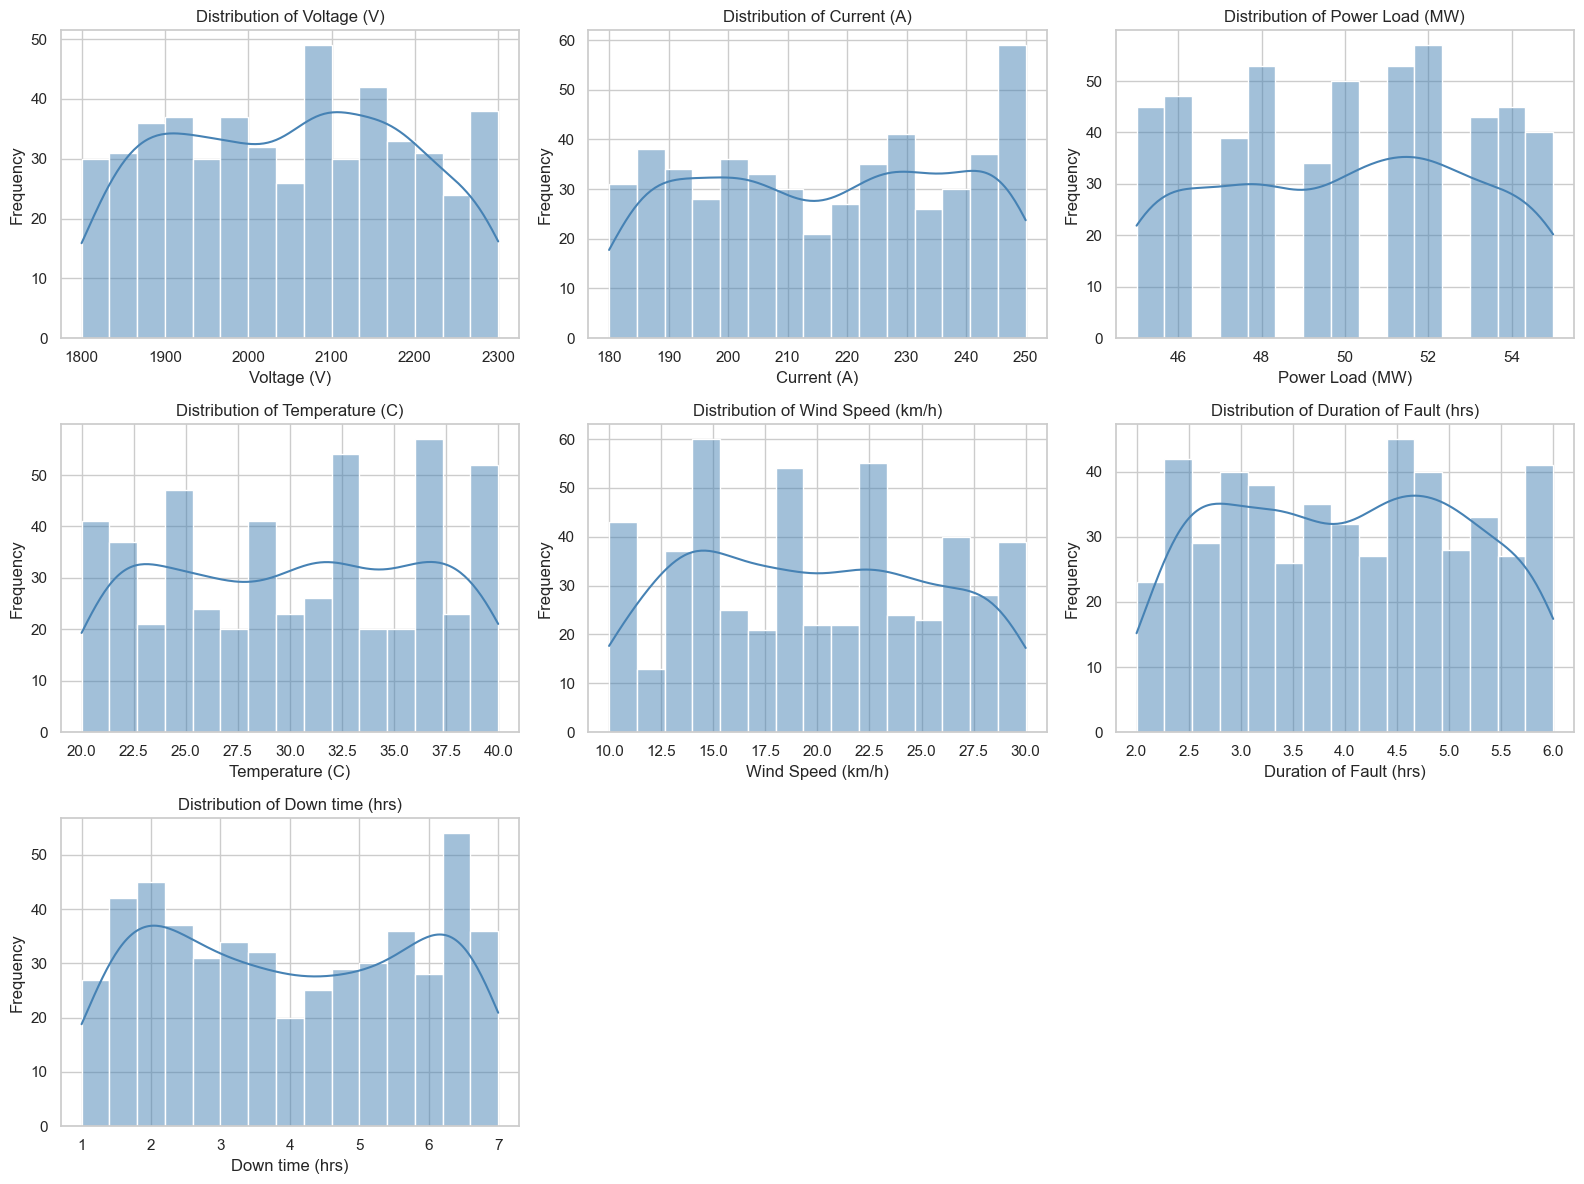

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
num_features = [
    'Voltage (V)', 
    'Current (A)', 
    'Power Load (MW)', 
    'Temperature (C)', 
    'Wind Speed (km/h)', 
    'Duration of Fault (hrs)', 
    'Down time (hrs)'
]

# Set up plot aesthetics
sns.set(style="whitegrid")
n_cols = 3
n_rows = (len(num_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create plots
for i, col in enumerate(num_features):
    sns.histplot(df[col], kde=True, bins=15, ax=axes[i], color='steelblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### 🗂️ Categorical Distribution

We explore the frequency distribution of each categorical variable using **count plots** (bar plots).

📊 Count plots are useful for:
- Understanding the balance between categories
- Detecting underrepresented or dominant categories
- Identifying data quality issues (e.g., typos or rare labels)

### Features:
- `Fault Type`
- `Weather Condition`
- `Maintenance Status`
- `Component Health`


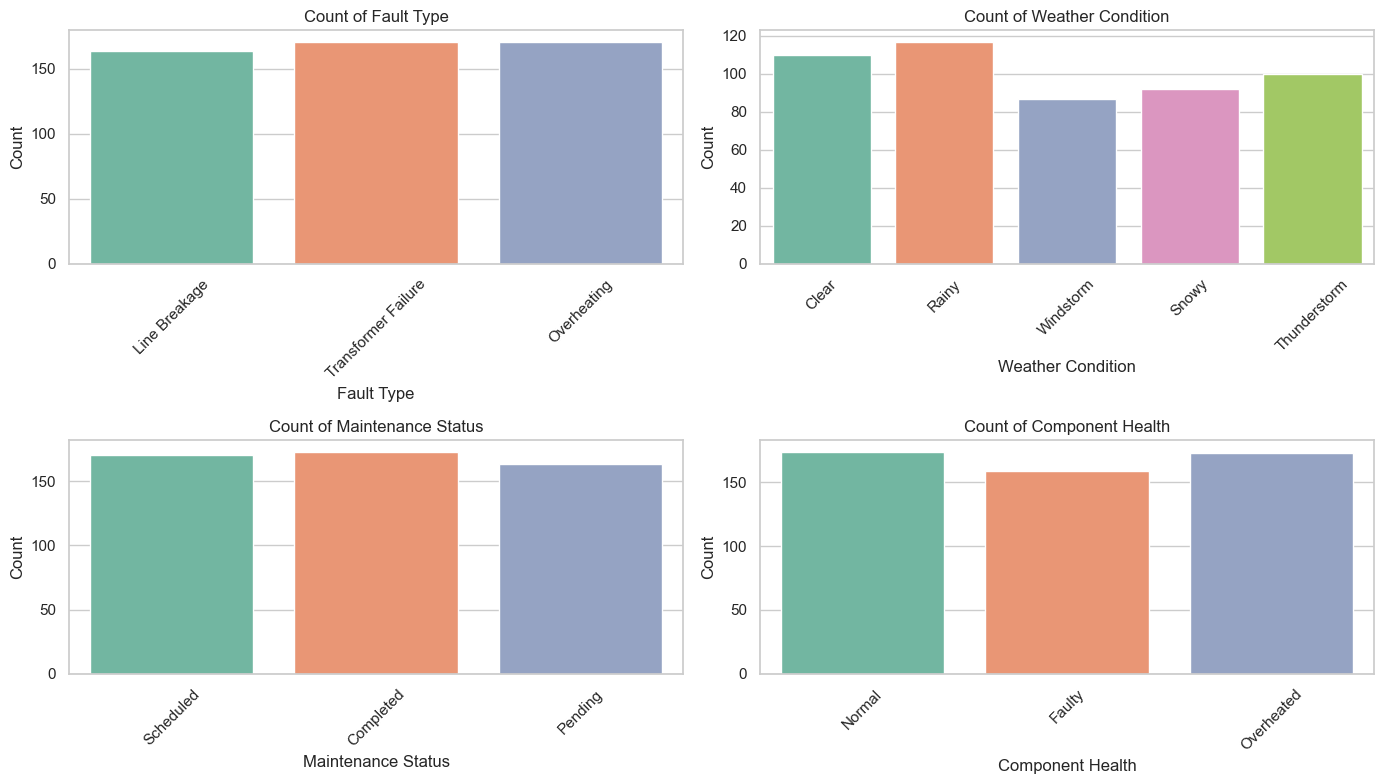

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features
cat_features = [
    'Fault Type', 
    'Weather Condition', 
    'Maintenance Status', 
    'Component Health'
]

# Set style
sns.set(style="whitegrid")
n_cols = 2
n_rows = (len(cat_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))

# Flatten axes
axes = axes.flatten()

# Create plots
for i, col in enumerate(cat_features):
    sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f'Count of {col}')
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

***
#### 🔗 Multivariate Analysis

Multivariate analysis allows us to explore relationships between multiple numerical variables simultaneously.

We use:
- **Pair Plot**: A grid of scatter plots between every pair of numerical features with histograms on the diagonal.
- **Parallel Coordinates Plot**: Each feature is shown as a vertical axis, and each record is a line crossing through all axes. This helps visualize patterns and clusters across high-dimensional space.

📈 These plots help identify:
- Correlations
- Clusters
- Outliers

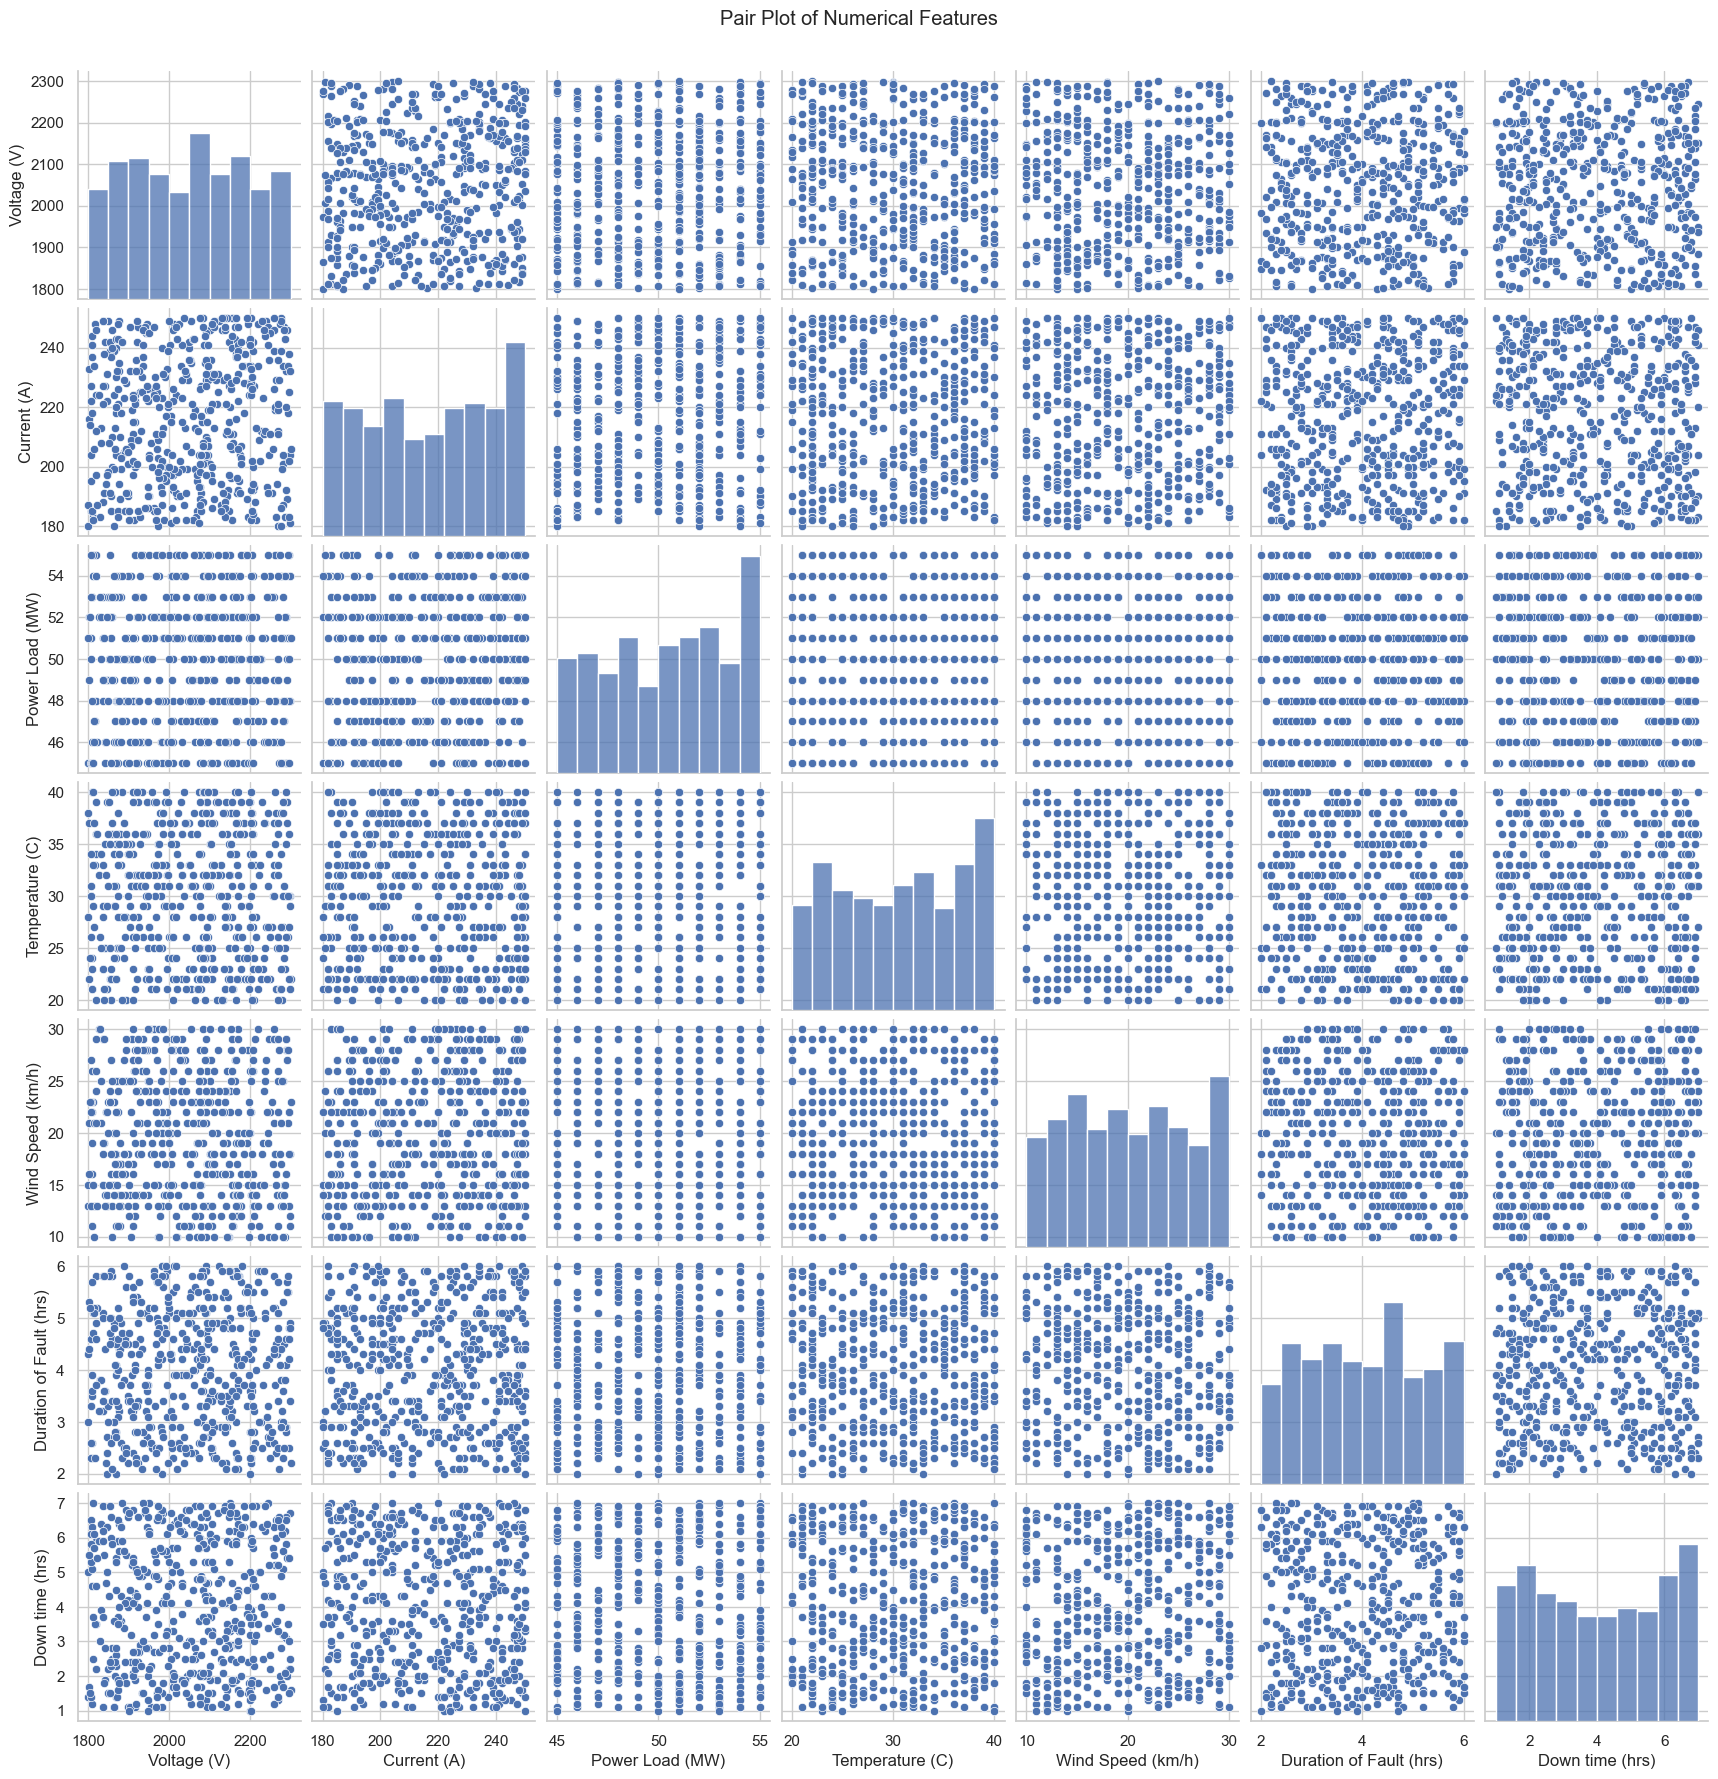

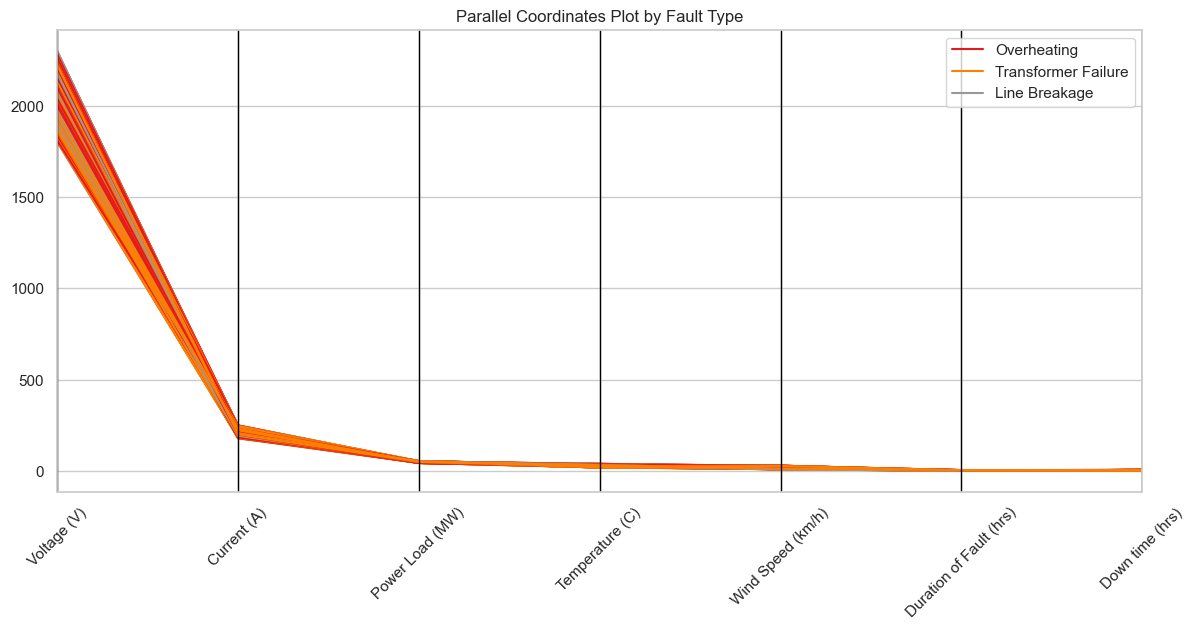

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Select numerical features
num_cols = ['Voltage (V)', 'Current (A)', 'Power Load (MW)', 
            'Temperature (C)', 'Wind Speed (km/h)', 
            'Duration of Fault (hrs)', 'Down time (hrs)']

# Pair Plot
sns.pairplot(df[num_cols])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

# Parallel Coordinates (requires a categorical class column)
# We'll use 'Fault Type' to color the lines
# Limit to a few samples if the dataset is large
sample_df = df[num_cols + ['Fault Type']].copy()
if len(sample_df) > 200:
    sample_df = sample_df.sample(200, random_state=42)

plt.figure(figsize=(14, 6))
parallel_coordinates(sample_df, class_column='Fault Type', colormap=plt.cm.Set1)
plt.title("Parallel Coordinates Plot by Fault Type")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### 🔗 Correlation Analysis of Numerical Variables

We examine the linear relationships between key numerical features using a **correlation heatmap**.

The heatmap uses color gradients and annotation to indicate:
- 🔴 Strong positive correlation (close to +1)
- 🔵 Strong negative correlation (close to -1)
- ⚪ No correlation (close to 0)

### Features analyzed:
- `Voltage (V)`
- `Current (A)`
- `Power Load (MW)`
- `Temperature (°C)`
- `Wind Speed (km/h)`
- `Duration of Fault (hrs)`
- `Down time (hrs)`

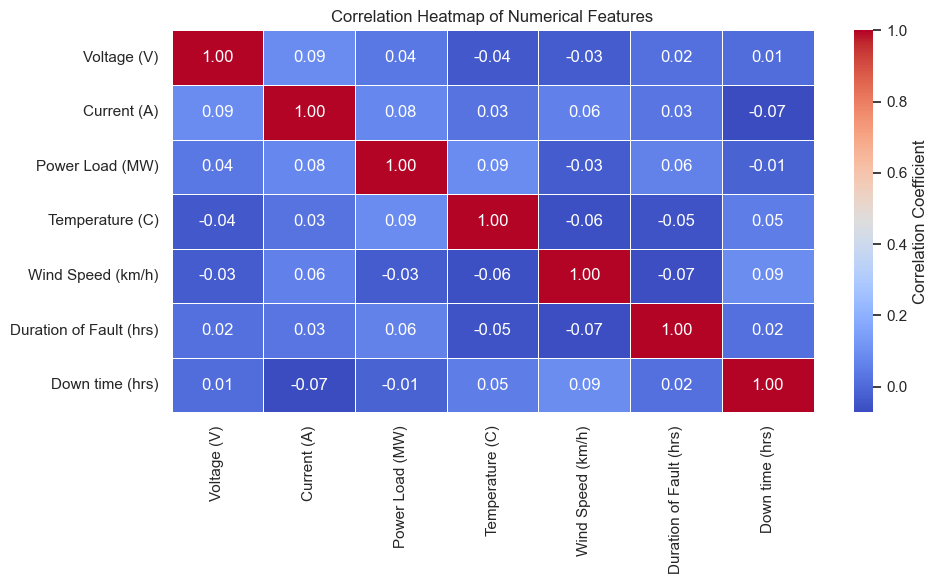

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
num_cols = [
    'Voltage (V)', 
    'Current (A)', 
    'Power Load (MW)', 
    'Temperature (C)', 
    'Wind Speed (km/h)', 
    'Duration of Fault (hrs)', 
    'Down time (hrs)'
]

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

#### 🧮 Categorical-Numerical Relationships

We use **box plots** and **violin plots** to explore how numerical variables vary across categorical groups. This helps identify trends, variability, and potential outliers between categories.

- **Box Plots** show the distribution of data based on quartiles and highlight outliers.
- **Violin Plots** add the kernel density estimation, providing insight into the distribution shape.

📊 Below we compare:
- `Voltage (V)` across `Fault Type`
- `Temperature (°C)` across `Weather Condition`

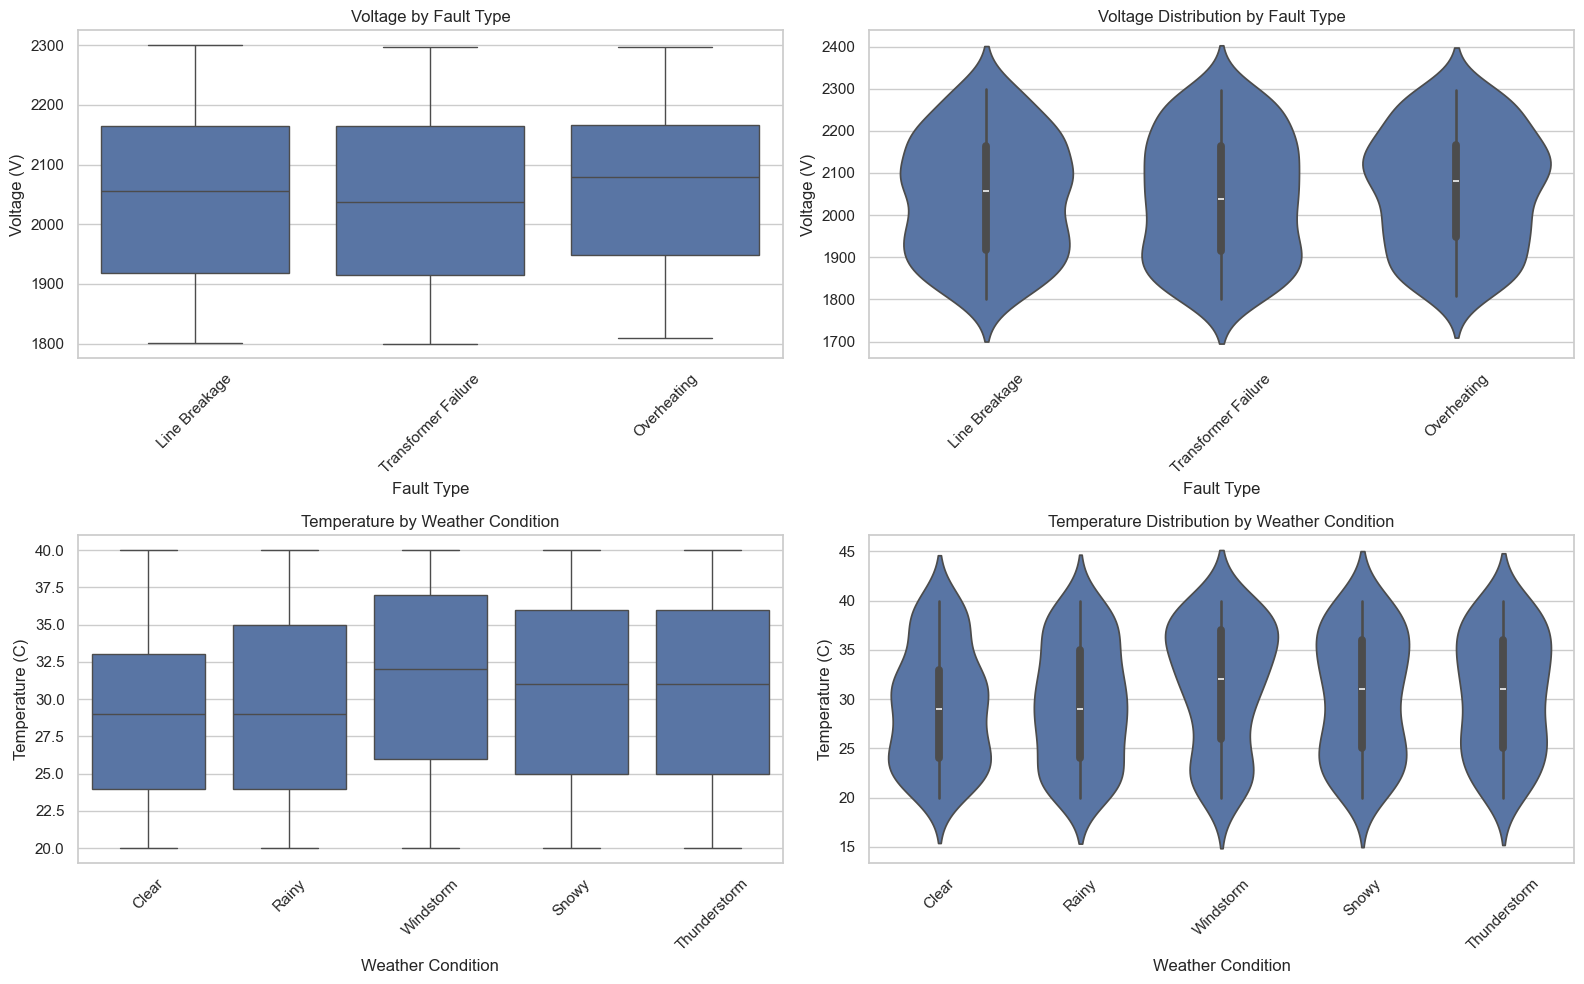

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Define plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Box Plot: Voltage by Fault Type 🔌 
sns.boxplot(x='Fault Type', y='Voltage (V)', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Voltage by Fault Type')
axes[0, 0].tick_params(axis='x', rotation=45)

# Violin Plot: Voltage by Fault Type 🎻 
sns.violinplot(x='Fault Type', y='Voltage (V)', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Voltage Distribution by Fault Type')
axes[0, 1].tick_params(axis='x', rotation=45)

# Box Plot: Temperature by Weather Condition 🌡️ 
sns.boxplot(x='Weather Condition', y='Temperature (C)', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Temperature by Weather Condition')
axes[1, 0].tick_params(axis='x', rotation=45)

# Violin Plot: Temperature by Weather Condition 🎻 
sns.violinplot(x='Weather Condition', y='Temperature (C)', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Temperature Distribution by Weather Condition')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### 🧱 Categorical-Categorical Relationships

We analyze how two categorical variables interact using:

- **Stacked Bar Plot**: Visualizes how subcategories (e.g., Weather Conditions) distribute within a primary category (e.g., Fault Type).
- **Heatmap**: Displays frequency of combinations between categories as a matrix, highlighting co-occurrence patterns.

🔍 Useful for identifying:
- Conditional distributions
- High/low frequency category intersections

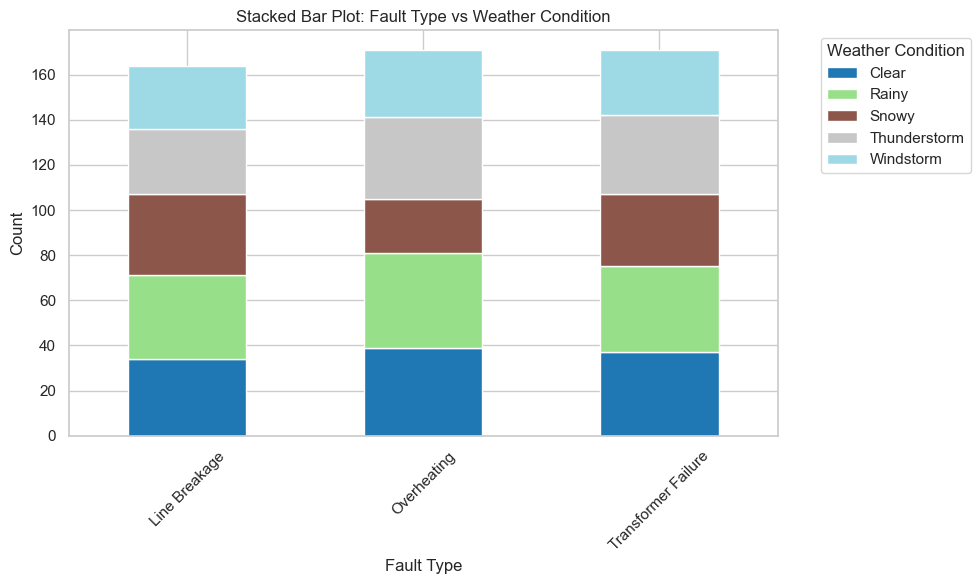

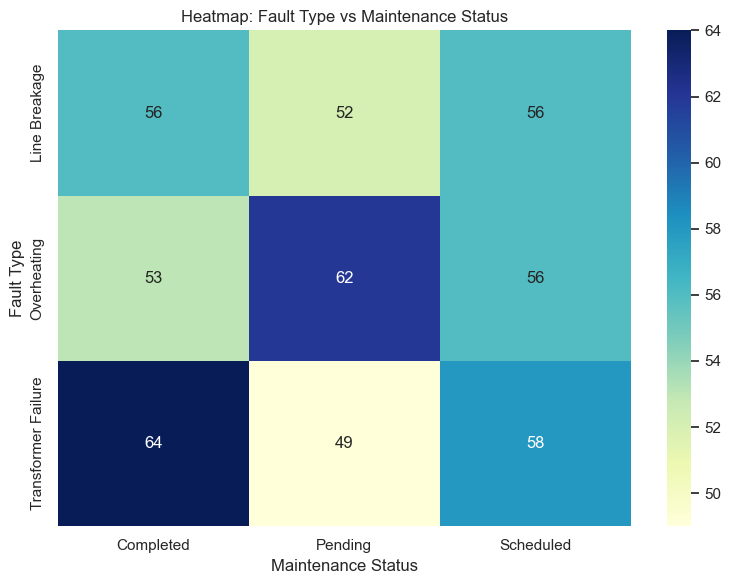

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Stacked Bar Plot: Fault Type vs Weather Condition
cross_tab = pd.crosstab(df['Fault Type'], df['Weather Condition'])

cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title("Stacked Bar Plot: Fault Type vs Weather Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Weather Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Heatmap: Fault Type vs Maintenance Status
heat_data = pd.crosstab(df['Fault Type'], df['Maintenance Status'])

plt.figure(figsize=(8, 6))
sns.heatmap(heat_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap: Fault Type vs Maintenance Status")
plt.ylabel("Fault Type")
plt.xlabel("Maintenance Status")
plt.tight_layout()
plt.show()


#### ⚙️ Component Health vs Maintenance Status

We explore the interaction between **Component Health** and **Maintenance Status** using:

- **Mosaic Plot**: Displays relative proportions of category combinations. Box sizes represent frequencies.
- **Grouped Bar Plot**: Compares raw counts across combinations of the two categorical variables.

🔍 This helps us understand if certain component health conditions are associated with specific maintenance actions.


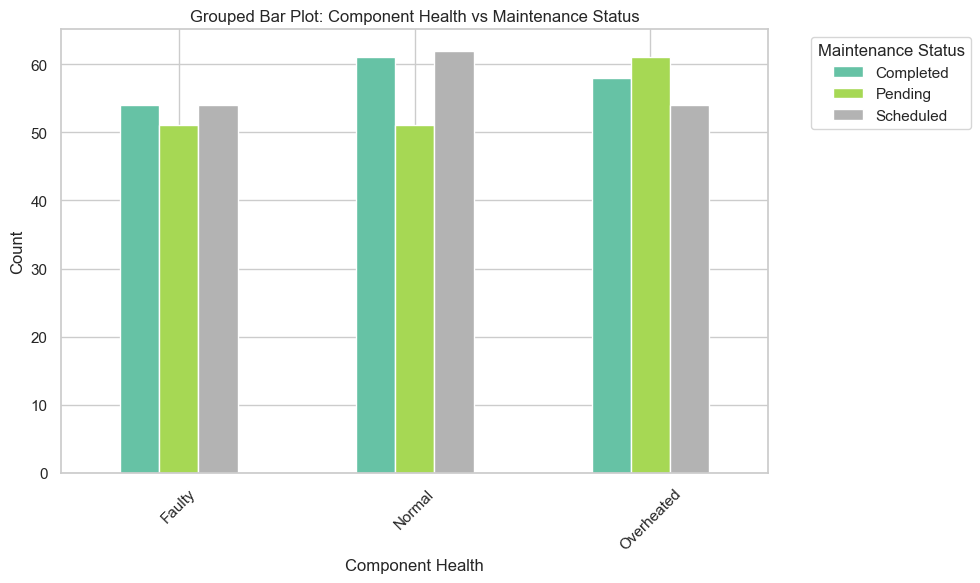

<Figure size 1000x600 with 0 Axes>

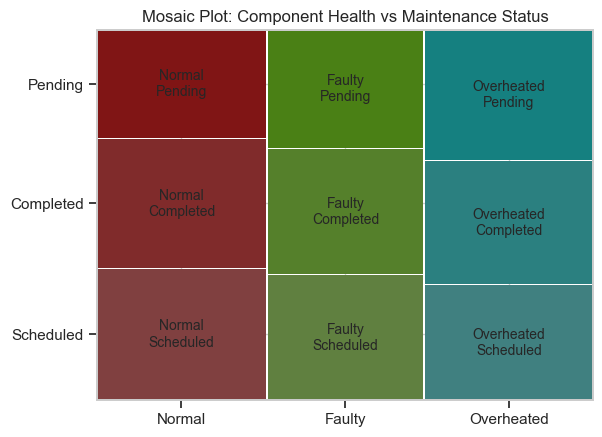

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd

# Grouped Bar Plot
grouped_counts = pd.crosstab(df['Component Health'], df['Maintenance Status'])

grouped_counts.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Grouped Bar Plot: Component Health vs Maintenance Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Maintenance Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Mosaic Plot
plt.figure(figsize=(10, 6))
mosaic(df, ['Component Health', 'Maintenance Status'], title='Mosaic Plot: Component Health vs Maintenance Status')
plt.show()
